In [2]:
#######################################################################
# MSDS 442: AI Agent Design and Development
# Spring '25
# Dr. Bader
#
# Final Project: AI Agent Automation for Peloton’s Fitness Ecosystem
# Phase 2 - Prototype
# 
# Kevin Geidel
#
#######################################################################

# OBJECTIVE:
#   Construct a high-fidelity prototype of the Peloton Automation. 
#   Implement the planned architecture using Phase 1 Artifacts.

# Load environment variables
from dotenv import load_dotenv
load_dotenv()

# Python native imports
import os, textwrap, json

# LangChain imports
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langchain_community.document_loaders import JSONLoader

# 3rd party package imports
from IPython.display import display, Image
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver


In [24]:
class PelotonAgent:
    ''' Namespace for methods and metaclasses that facilliate Peloton's Agent-based automation. '''

    class InquiryState(TypedDict):
        inquiry: str
        response: str
        referring_node: str
        next_node: str
        messages: Annotated[Sequence[BaseMessage], "List of messages in the conversation"]

    def __init__(self):
        # Assign agent-wide variables
        self.model_name = 'gpt-4o-mini'
        self.data_dir = os.path.join('src')
        self.agent_data_path = os.path.join(self.data_dir, 'ai_agent_test_data.json')        
        
        # Establish the AI client
        self.llm = ChatOpenAI(model=self.model_name, temperature=0)

        # Load test data into memory in form of langchain docs
        self.load_documents()

        # Construct the agent graph
        self.build_graph()

    def load_documents(self):
        loader = JSONLoader(
            file_path=self.agent_data_path, 
            jq_schema='.',
            text_content=False,
        )
        self.data= loader.load()
    
    def build_graph(self):
        builder = StateGraph(self.InquiryState)
        # nodes
        builder.add_node('Router', self.router_agent)
        builder.add_node('Marketing', self.marketing_agent)
        builder.add_node('DataScience', self.data_science_agent)
        builder.add_node('Membership', self.membership_agent)
        builder.add_node('Orders', self.orders_agent)
        builder.add_node('Recommendations', self.recommendation_agent)
        # edges/workflow
        builder.add_edge(START, 'Router')
        builder.add_conditional_edges(
            'Router',
            lambda x: x['next_node'],
        )
        for node in ['Marketing', 'DataScience', 'Membership', 'Orders', 'Recommendations']:
            builder.add_edge(node, END)
        
        self.graph = builder.compile(checkpointer=MemorySaver())

    def draw_graph(self):
        display(Image(self.graph.get_graph().draw_mermaid_png()))
    
    # define agents methods
    def router_agent(self, state):
        return {}
    
    def marketing_agent(self, state):
        return {}
    
    def data_science_agent(self, state):
        return {}
    
    def membership_agent(self, state):
        return {}
    
    def orders_agent(self, state):
        return {}
    
    def recommendation_agent(self, state):
        return {}



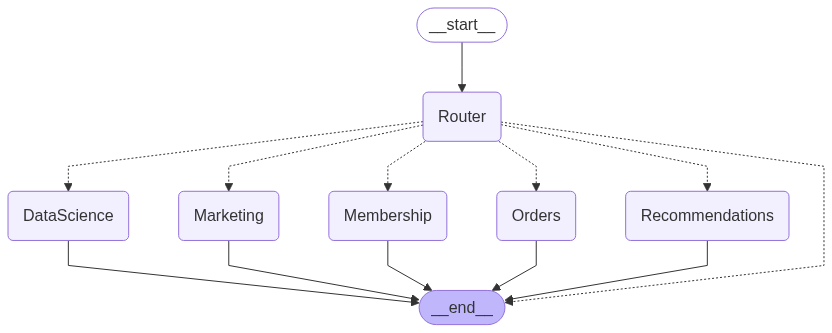

In [25]:
bot = PelotonAgent()
bot.draw_graph()